In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pylab import cm

import matplotlib.dates as mdates
from matplotlib.pyplot import MultipleLocator
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (AutoLocator, AutoMinorLocator)
from matplotlib.dates import DateFormatter
#import matplotlib.cm as cm
import matplotlib.colors as colors
from collections import OrderedDict

In [2]:
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr#
from scipy import stats 

import matplotlib.pyplot as plt
from pylab import cm
import matplotlib as mpl

from collections import OrderedDict
from adjustText import adjust_text

%matplotlib inline
%config InlineBackend.figure_format='svg'
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_30188/127070983.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [3]:
from adjustText import adjust_text
import matplotlib as mpl
def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi))
    
def plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30,):
    secax1 = ax.secondary_xaxis('top', functions=(mjd2numsdate,datenums2mjd))
    secax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    secax1.xaxis.set_major_locator(mdates.DayLocator(interval=ma_interval))
    secax1.xaxis.set_minor_locator(mdates.DayLocator(interval=mi_interval))
    secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
    secax1.xaxis.set_tick_params(which='minor', size=5, width=2, direction='out')
    secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out', rotation=rotation,)    
    
def set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99)):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
    #by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=bbox_to_anchor,
              loc=2, numpoints=1,ncol=1,fontsize=11.)
    
def set_ax_legend_sequence(ax,bbox_to_anchor=(0.01, 0.99)):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    #by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
    by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=bbox_to_anchor,
              loc=2, numpoints=1,ncol=1,fontsize=11.)    
    

def set_mag_ylim(ax):
    bottom, top = ax.set_ylim()
    if bottom< top:
        ax.set_ylim(top,bottom)   
        
        
def set_mag_xlim(ax):
    bottom, top = ax.set_xlim()
    if bottom< top:
        ax.set_xlim(top,bottom)           

In [4]:
def drop_index(data):
    data=data.reset_index(drop=True)
    return data

import pandas as pd
import numpy as np
import os

def get_obsids(path):
    dirname=os.listdir(path)
    obsids=[]
    for i in dirname:
        if i.isdigit():
            obsids.append(i)
    obsids.sort()        
    return obsids

In [5]:
from astropy.time import Time
from astropy.io import fits
import time
from matplotlib.pyplot import MultipleLocator
import matplotlib.dates as mdates

def datetime2mjd(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    x=mdates.date2num(x)
    y = x - mjd_minus_mdates_num   
    return y

def mjd2datetime(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y= x + mjd_minus_mdates_num
    y= mdates.num2date(y)
    return y



def datenums2mjd(x):
    #x=mdates.date2num(x)
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y = x - mjd_minus_mdates_num   
    return y

def mjd2numsdate(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    y= x + mjd_minus_mdates_num
    #y= mdates.num2date(y)
    return y


def convert_xaxis_mjd(time):
    return Time(time).mjd   

def convert_xaxis_time(mjd):
    return Time(mjd,format='mjd').to_datetime()


def date2yday(x):
    """
    x is in matplotlib datenums, so they are floats.
    """
    y = x - mdates.date2num(datetime(2018, 1, 1))
    return y

def yday2date(x):
    """
    return a matplotlib datenum (x is days since start of year of 2018)
    """
    y = x + mdates.date2num(datetime(2018, 1, 1))
    return y


def convert_partial_year(numbers):
    datetimes=[]
    for number in numbers:
        year = int(number)
        d = timedelta(days=(number - year)*(365 + is_leap(year)))
        day_one = datetime(year,1,1)
        date = d + day_one
        datetimes.append(date)
    return datetimes


def is_leap(year):
    if not year%4 and  year%100 or not year%400:
        return True
    return False


def convert_mjd(times):
    timesmjd=[]
    for i in times:
        timesmjd.append(Time(i).mjd)
    return timesmjd  


def convert_date(times):
    timesdate=[]
    for i in times:
        timesdate.append(Time(i,format='mjd').datetime)
    return timesdate

def convert_date_single(time):
    timedate=Time(time,format='mjd').datetime
    return timedate

# sample

## lamost_phase1_v03_dr1to5_QSO

In [64]:
lamost_phase1_v03_dr1to5_QSO = fits.open('/Users/lyubing/Downloads/LAMOST_青年研究员/lamost_phase1_v03_dr1to5_QSO.fits')

In [65]:
lamost_phase1_v03_dr1to5_QSO_data=lamost_phase1_v03_dr1to5_QSO[1].data

In [ ]:
lamost_phase1_v03_dr1to5_QSO_data.columns

In [ ]:
len(lamost_phase1_v03_dr1to5_QSO_data)

### lamost_dr6to9_QSO

In [66]:
lamost_dr6to9_QSO =fits.open('/Users/lyubing/Downloads/LAMOST_青年研究员/lamost_dr6_9_Jinjunjie_datafile2.fits')

In [67]:
lamost_dr6to9_QSO.info()

Filename: /Users/lyubing/Downloads/LAMOST_青年研究员/lamost_dr6_9_Jinjunjie_datafile2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   ()      
  1  Joined        1 BinTableHDU    326   13066R x 156C   [J, 10A, 20A, D, D, J, 19A, I, I, D, I, I, D, I, D, E, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 18A, 21A, E, D, E, D, 21A, D, D, D, D, D, D, D, D, D, D, D, D, D, I, E, E, E, E, E, E, E, E, E, E, E, E]   


In [68]:
lamost_dr6to9_QSO_data=lamost_dr6to9_QSO[1].data

In [ ]:
lamost_dr6to9_QSO_data.columns

In [ ]:
len(lamost_dr6to9_QSO_data)+len(lamost_phase1_v03_dr1to5_QSO_data)

### lamost_dr45_Yaosu

In [80]:
lamost_dr45_Yaosu =fits.open('/Users/lyubing/Downloads/LAMOST_青年研究员/lamost_apjsaaef88t1_mrt_Yaosu_dr45.fits')

In [81]:
lamost_dr45_Yaosu_data=lamost_dr45_Yaosu[1].data

In [82]:
len(lamost_dr45_Yaosu_data)

19253

lamost_dr45_Yaosu_data.columns

## lamost_dr10v1 all

In [47]:
lamost_dr10v1 =fits.open('/Users/lyubing/Downloads/LAMOST_青年研究员/dr10_v1.0_LRS_catalogue.fits.gz')

In [49]:
lamost_dr10v1_data=lamost_dr10v1[1].data

In [50]:
len(lamost_dr10v1_data)

11817430

In [ ]:
lamost_dr10v1_data.columns

In [51]:
lamost_dr10v1_data_class=[]
lamost_dr10v1_data_subclass=[]

for i,j in zip(lamost_dr10v1_data['class'],lamost_dr10v1_data['subclass']):
    if i not in lamost_dr10v1_data_class:
        lamost_dr10v1_data_class.append(i)
    if j not in lamost_dr10v1_data_subclass:
        lamost_dr10v1_data_subclass.append(j)

In [52]:
lamost_dr10v1_data_class

['GALAXY', 'STAR', 'QSO']

## lamost_dr10v1_data_QSO

In [53]:
lamost_dr10v1_data_QSO=lamost_dr10v1_data[lamost_dr10v1_data['class']=='QSO']
lamost_dr10v1_data_GALAXY=lamost_dr10v1_data[lamost_dr10v1_data['class']=='GALAXY']

In [54]:
len(lamost_dr10v1_data_QSO)

80342

In [84]:
len(lamost_dr10v1_data_GALAXY)

263444

lamost_dr10v1_data_subclass

## lamost_dr10v1_QSO_Emission Line Features of QSOs

lamost_dr10v1_QSO =fits.open('/Users/lyubing/Downloads/LAMOST_青年研究员/dr10_v1.0_LRS_qso.fits.gz')

lamost_dr10v1_QSO_data=lamost_dr10v1_QSO[1].data

## lamost_dr10v1_galaxy_Stellar Population Synthesis of Galaxies

lamost_dr10v1_galaxy =fits.open('/Users/lyubing/Downloads/LAMOST_青年研究员/dr10_v1.0_LRS_galaxy.fits.gz')

lamost_dr10v1_galaxy_data=lamost_dr10v1_galaxy[1].data

In [ ]:
len(lamost_dr10v1_QSO_data)

In [ ]:
len(lamost_dr10v1_galaxy_data)

## ROMA_RZCAT

In [87]:
Roma_BZCAT = fits.open('/Users/lyubing/Downloads/kangshiju_paper/ROMABZCAT - Roma-BZCAT Multi-Frequency Catalog of Blazars/VII_274.fits')
Roma_BZCAT_data=Roma_BZCAT[1].data 

In [223]:
Roma_BZCAT_data.columns

ColDefs(
    name = 'Seq'; format = 'I4'; disp = 'I4'; start = 1
    name = 'Name'; format = 'A15'; start = 6
    name = 'RAh'; format = 'I2'; unit = 'h'; disp = 'I2'; start = 22
    name = 'RAm'; format = 'I2'; unit = 'min'; disp = 'I2'; start = 25
    name = 'RAs'; format = 'F5.2'; unit = 's'; disp = 'F5.2'; start = 28
    name = 'DE-'; format = 'A1'; start = 34
    name = 'DEd'; format = 'I2'; unit = 'deg'; disp = 'I2'; start = 35
    name = 'DEm'; format = 'I2'; unit = 'arcmin'; disp = 'I2'; start = 38
    name = 'DEs'; format = 'F5.2'; unit = 'arcsec'; disp = 'F5.2'; start = 41
    name = 'GLON'; format = 'F6.2'; unit = 'deg'; disp = 'F6.2'; start = 47
    name = 'GLAT'; format = 'F6.2'; unit = 'deg'; disp = 'F6.2'; start = 54
    name = 'z'; format = 'F5.3'; disp = 'F5.3'; start = 61
    name = 'u_z'; format = 'A1'; start = 66
    name = 'Rmag'; format = 'F4.1'; unit = 'mag'; disp = 'F4.1'; start = 68
    name = 'Class'; format = 'A24'; start = 73
    name = 'FR'; format = 'F8.1'

In [88]:
ROMA_RZCAT_class=[]
for i in Roma_BZCAT_data['Class']:
    if i not in ROMA_RZCAT_class:
        ROMA_RZCAT_class.append(i)

In [100]:
Roma_BZCAT_data

FITS_rec([(1, '5BZQ J0000-3221', 0, 0, 20.39, '-', 32, 21, 1.0, 4.64, -77.76, 1.275, '', 18.2, 'QSO RLoud flat radio sp.', 521.0, 0, 0.05, 0.0, 0.707),
          (2, '5BZQ J0001-1551', 0, 1, 5.29, '-', 15, 51, 6.98, 74.36, -73.77, 2.044, '', 18.1, 'QSO RLoud flat radio sp.', 348.0, 0, 0.0, 0.0, 0.661),
          (3, '5BZQ J0001+1914', 0, 1, 8.62, '+', 19, 14, 34.18, 106.86, -42.06, 3.1, '', 21.6, 'QSO RLoud flat radio sp.', 265.0, 0, 0.0, 0.0, 0.917),
          ...,
          (3559, '5BZB J2359-3037', 23, 59, 7.91, '-', 30, 37, 41.41, 12.84, -78.04, 0.165, '', 15.8, 'BL Lac', 62.0, 0, 40.2, 6e-10, 0.304),
          (3560, '5BZQ J2359+3850', 23, 59, 33.18, '+', 38, 50, 42.28, 111.99, -22.93, 2.711, '', 19.1, 'QSO RLoud flat radio sp.', 524.0, 0, 0.51, 0.0, 0.745),
          (3561, '5BZQ J2359-3133', 23, 59, 35.49, '-', 31, 33, 43.81, 8.41, -77.88, 0.99, '', 19.9, 'QSO RLoud flat radio sp.', 347.0, 0, 0.27, 0.0, 0.84)],
         dtype=(numpy.record, {'names': ['Seq', 'Name', 'RAh', 'RAm'

In [89]:
len(Roma_BZCAT_data)

3561

In [90]:
ROMA_RZCAT_class

['QSO RLoud flat radio sp.',
 'BL Lac',
 'BL Lac-galaxy dominated',
 'Blazar Uncertain type',
 'BL Lac Candidate']

In [96]:
Roma_BZCAT_BLQ=Roma_BZCAT_data[Roma_BZCAT_data['Class']=='QSO RLoud flat radio sp.']

In [97]:
len(Roma_BZCAT_BLQ)

1909

In [98]:
Roma_BZCAT_BLG=Roma_BZCAT_data[Roma_BZCAT_data['Class']=='BL Lac-galaxy dominated']

In [99]:
len(Roma_BZCAT_BLG)

274

In [91]:
Roma_BZCAT_BLL=Roma_BZCAT_data[Roma_BZCAT_data['Class']=='BL Lac']

In [92]:
len(Roma_BZCAT_BLL)

1059

In [93]:
Roma_BZCAT_BLLC=Roma_BZCAT_data[Roma_BZCAT_data['Class']=='BL Lac Candidate']

In [94]:
len(Roma_BZCAT_BLLC)

92

In [95]:
1059+92

1151

In [ ]:
Roma_BZCAT_data

In [85]:
Roma_BZCAT_data['DE-']

chararray(['-', '-', '+', ..., '-', '+', '-'], dtype='<U1')

In [86]:
Roma_BZCAT_data['DEd']

array([32, 15, 19, ..., 30, 38, 31], dtype=int16)

## Roma_BZCAT_data_coords

from astropy import units as u
from astropy.coordinates import SkyCoord
#c = SkyCoord(ra=10.625*u.degree, dec=41.2*u.degree, frame='icrs')
#c = SkyCoord(10.625, 41.2, frame='icrs', unit='deg')
#c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')
#c = SkyCoord('00h42.5m', '+41d12m')
#c = SkyCoord('00 42 30 +41 12 00', unit=(u.hourangle, u.deg))
#c = SkyCoord('00:42.5 +41:12', unit=(u.hourangle, u.deg))
Roma_BZCAT_data_coords_ra=  Roma_BZCAT_data['RAh']*15.0+Roma_BZCAT_data['RAm']/4.0+Roma_BZCAT_data['RAs']/240.0
Roma_BZCAT_data_coords_dec=   Roma_BZCAT_data['DEd']+Roma_BZCAT_data['DEm']/60.0+Roma_BZCAT_data['DEs']/3600.0
#Roma_BZCAT_data_coords= SkyCoord( )

Roma_BZCAT_data_coords_decC=[]
for i,j in zip(Roma_BZCAT_data['DE-'],Roma_BZCAT_data_coords_dec):
    if i=='-':
        Roma_BZCAT_data_coords_decC.append(-1*j)
    else:
        Roma_BZCAT_data_coords_decC.append(j)
            

In [252]:
from astropy.table import Table
table_lamost = Table.read('/Users/lyubing/Downloads/LAMOST_青年研究员/lamost_phase1_v03_dr1to5_QSO.fits')
table_Roma_BZCAT = Table.read('/Users/lyubing/Downloads/kangshiju_paper/ROMABZCAT - Roma-BZCAT Multi-Frequency Catalog of Blazars/VII_274.fits')


In [254]:
cat_lamost=table_lamost.to_pandas()

cat_bz=table_Roma_BZCAT.to_pandas()

In [255]:
def combine_RA(row):
    return "{}h{}m{}s".format(row["RAh"], row["RAm"], row["RAs"])
def combine_DEC(row):
    return "{}{}d{}m{}s".format(str(row['DE-'],encoding = 'utf-8'), row["DEd"], row["DEm"], row["DEs"])

cat_bz['ra_str'] = cat_bz.apply(combine_RA, axis=1)
cat_bz['dec_str'] = cat_bz.apply(combine_DEC, axis=1)

In [256]:
from astropy import units as u
from astropy.coordinates import SkyCoord

def get_ra(row):
    c = SkyCoord(row['ra_str'], row['dec_str'], frame='icrs')
    return c.ra.degree
def get_dec(row):
    c = SkyCoord(row['ra_str'], row['dec_str'], frame='icrs')
    return c.dec.degree

cat_bz['ra'] = cat_bz.apply(get_ra, axis=1)
cat_bz['dec'] = cat_bz.apply(get_dec, axis=1)

#cat_bz.to_csv("VII_274.csv", index=False)

In [251]:
def HMS2deg(ra='', dec=''):
    RA, DEC, rs, ds = '', '', 1, 1
    if dec:
        D, M, S = [float(i) for i in dec.split()]
    if str(D)[0] == '-':
        ds, D = -1, abs(D)
        
    deg = D + (M/60) + (S/3600)
    DEC = '{0}'.format(deg*ds)
  
    if ra:
        H, M, S = [float(i) for i in ra.split()]
        if str(H)[0] == '-':
            rs, H = -1, abs(H)
        deg = (H*15) + (M/4) + (S/240)
        RA = '{0}'.format(deg*rs)
  
    if ra and dec:
        return (RA, DEC)
    else:
        return RA or DEC

import PyAstronomy
from PyAstronomy import pyasl

radegree= PyAstronomy.pyasl.hmsToDeg(1, 1, 1) #PyAstronomy.pyasl.hmsToDeg(h, m, s)
decdegree= PyAstronomy.pyasl.dmsToDeg(1, 1, 1,) #PyAstronomy.pyasl.dmsToDeg(d, m, s, esign=0)

In [ ]:
radegree,decdegree

In [239]:
index=1
print(Roma_BZCAT_data_coords_ra[index],Roma_BZCAT_data_coords_decC[index])

0.01813611111111111 -15.851938888888888


In [ ]:
Roma_BZCAT_data_coords_ra

In [ ]:
Roma_BZCAT_data_coords_dec

Roma_BZCAT_data_coords_decC

In [137]:
min(Roma_BZCAT_data_coords_ra),max(Roma_BZCAT_data_coords_ra)

(0.005663888888888889, 345.9931916666667)

In [136]:
min(Roma_BZCAT_data_coords_decC),max(Roma_BZCAT_data_coords_decC)

(-86.2505, 86.20591944444445)

In [236]:
figure_n= 1
fig = plt.figure(figsize=(8,figure_n*6))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(figure_n,1,1)
#plt.subplot(projection="aitoff")

plt.scatter(Roma_BZCAT_data_coords_ra,Roma_BZCAT_data_coords_decC,zorder=1,label='Roma_BZCAT')

#plt.scatter(lamost_dr10v1_data_QSO['RA'],lamost_dr10v1_data_QSO['DEC'])
plt.scatter(lamost_phase1_v03_dr1to5_QSO_data['RA'], lamost_phase1_v03_dr1to5_QSO_data['DEC'],zorder=0,label='LAMOST_dr1-5 QSO')
plt.legend(bbox_to_anchor=(0.69, 0.99))
plt.show()
plt.close()


## fermi

In [6]:
gll_psc_v31 = fits.open('/Users/lyubing/Downloads/kangshiju_paper/gll_psc_v31.fit')

In [7]:
gll_psc_v31_data=gll_psc_v31[1].data

In [194]:
len(gll_psc_v31_data)

6659

In [9]:
Fermi_4LAC_DR3_h = fits.open('/Users/lyubing/Downloads/kangshiju_paper/table-4LAC-DR3-h.fits')


In [10]:
Fermi_4LAC_DR3_h_data = Fermi_4LAC_DR3_h[1].data

In [11]:
Fermi_4LAC_DR3_h[1].data.columns

ColDefs(
    name = 'Source_Name'; format = '18A'
    name = 'DataRelease'; format = 'I'; null = 16959
    name = 'RAJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'DEJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'GLON'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'GLAT'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Signif_Avg'; format = 'E'; disp = 'F8.3'
    name = 'Flux1000'; format = 'E'; unit = 'ph cm-2 s-1'; disp = 'E10.4'
    name = 'Unc_Flux1000'; format = 'E'; unit = 'ph cm-2 s-1'; disp = 'E10.4'
    name = 'Energy_Flux100'; format = 'E'; unit = 'erg cm-2 s-1'; disp = 'E10.4'
    name = 'Unc_Energy_Flux100'; format = 'E'; unit = 'erg cm-2 s-1'; disp = 'E10.4'
    name = 'SpectrumType'; format = '18A'
    name = 'PL_Index'; format = 'E'; disp = 'F8.4'
    name = 'Unc_PL_Index'; format = 'E'; disp = 'F8.4'
    name = 'Pivot_Energy'; format = 'E'; unit = 'MeV'; disp = 'F10.2'
    name = 'LP_Index'; format = 'E'; disp = 'F8.4'
    nam

In [16]:
Fermi_4LAC_DR3_h[1].data['CLASS']

chararray(['bcu', 'bll', 'bll', ..., 'bcu', 'bcu', 'bcu'], dtype='<U5')

In [115]:
len(Fermi_4LAC_DR3_h[1].data['CLASS'])

3407

In [19]:
Fermi_4LAC_DR3_h_types=[]
for i in Fermi_4LAC_DR3_h[1].data['CLASS']:
    if i not in Fermi_4LAC_DR3_h_types:
        Fermi_4LAC_DR3_h_types.append(i)

In [20]:
Fermi_4LAC_DR3_h_types

['bcu',
 'bll',
 'fsrq',
 'rdg',
 'agn',
 'FSRQ',
 'BLL',
 'RDG',
 'nlsy1',
 'css',
 'AGN',
 'ssrq',
 'NLSY1',
 'sey']

### Fermi_4LAC_DR3_h_bll 

In [113]:
Fermi_4LAC_DR3_h_BLL = Fermi_4LAC_DR3_h_data[Fermi_4LAC_DR3_h_data['CLASS']=='BLL']

In [114]:
len(Fermi_4LAC_DR3_h_BLL)

22

In [125]:
Fermi_4LAC_DR3_h_bll = Fermi_4LAC_DR3_h_data[Fermi_4LAC_DR3_h_data['CLASS'].lower()=='bll']

In [126]:
len(Fermi_4LAC_DR3_h_bll)

1379

In [212]:
Fermi_4LAC_DR3_h_bll.columns

ColDefs(
    name = 'Source_Name'; format = '18A'
    name = 'DataRelease'; format = 'I'; null = 16959
    name = 'RAJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'DEJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'GLON'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'GLAT'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Signif_Avg'; format = 'E'; disp = 'F8.3'
    name = 'Flux1000'; format = 'E'; unit = 'ph cm-2 s-1'; disp = 'E10.4'
    name = 'Unc_Flux1000'; format = 'E'; unit = 'ph cm-2 s-1'; disp = 'E10.4'
    name = 'Energy_Flux100'; format = 'E'; unit = 'erg cm-2 s-1'; disp = 'E10.4'
    name = 'Unc_Energy_Flux100'; format = 'E'; unit = 'erg cm-2 s-1'; disp = 'E10.4'
    name = 'SpectrumType'; format = '18A'
    name = 'PL_Index'; format = 'E'; disp = 'F8.4'
    name = 'Unc_PL_Index'; format = 'E'; disp = 'F8.4'
    name = 'Pivot_Energy'; format = 'E'; unit = 'MeV'; disp = 'F10.2'
    name = 'LP_Index'; format = 'E'; disp = 'F8.4'
    nam

### Fermi_name-list

In [218]:
Fermi_4LAC_DR3_h_bll_df = pd.DataFrame(Fermi_4LAC_DR3_h_bll['Source_Name'], columns = ['Name'])

In [219]:
Fermi_4LAC_DR3_h_bll_df.to_csv('/Users/lyubing/Downloads/kangshiju_paper/fermi_bll.csv',index=False)

In [220]:
Fermi_4LAC_DR3_h_fsrq_df = pd.DataFrame(Fermi_4LAC_DR3_h_fsrq['Source_Name'], columns = ['Name'])

In [221]:
Fermi_4LAC_DR3_h_fsrq_df.to_csv('/Users/lyubing/Downloads/kangshiju_paper/fermi_fsrq.csv',index=False)

### Fermi_4LAC_DR3_h_fsrq

In [127]:
Fermi_4LAC_DR3_h_fsrq=Fermi_4LAC_DR3_h_data[Fermi_4LAC_DR3_h_data['CLASS'].lower()=='fsrq']

In [128]:
len(Fermi_4LAC_DR3_h_fsrq)

755

In [23]:
Fermi_4LAC_DR3_h_FSRQ=Fermi_4LAC_DR3_h_data[Fermi_4LAC_DR3_h_data['CLASS']=='FSRQ']

In [24]:
len(Fermi_4LAC_DR3_h_FSRQ)

40

In [ ]:
ra=144.9105038
dec=-3.2511027
Fermi_4LAC_DR3_h_data_select= Fermi_4LAC_DR3_h_data[ abs(Fermi_4LAC_DR3_h_data['RA_Counterpart']-ra)<0.5]
Fermi_4LAC_DR3_h_data_select= Fermi_4LAC_DR3_h_data_select[ abs(Fermi_4LAC_DR3_h_data_select['DEC_Counterpart']-dec)<0.5]




In [ ]:
Fermi_4LAC_DR3_h_data_select

In [ ]:
ra= 144.9105038
dec= -3.2511027
gll_psc_v31_data_select= gll_psc_v31_data[ abs(gll_psc_v31_data['RA_Counterpart']-ra)<0.5]
gll_psc_v31_data_select= gll_psc_v31_data_select[ abs(gll_psc_v31_data_select['DEC_Counterpart']-dec)<0.5]




In [ ]:
gll_psc_v31_data_select

## milliquas_v710

In [25]:
milliquas_v710= fits.open('/Volumes/ExtremeSSD/Survey_fits/Survey_fits/Survey_fits/The Million Quasars (Milliquas) catalog, v7.4d, 13 February 2022/v7.10/milliquas.fits')


In [26]:
milliquas_v710[1].data.columns

ColDefs(
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'NAME'; format = '25A'
    name = 'TYPE'; format = '4A'
    name = 'RMAG'; format = 'E'
    name = 'BMAG'; format = 'E'
    name = 'COMMENT'; format = '3A'
    name = 'R'; format = '1A'
    name = 'B'; format = '1A'
    name = 'Z'; format = 'E'
    name = 'CITE'; format = '6A'
    name = 'ZCITE'; format = '6A'
    name = 'RXPCT'; format = 'I'; null = -32768
    name = 'QPCT'; format = 'I'; null = -32768
    name = 'XNAME'; format = '22A'
    name = 'RNAME'; format = '22A'
    name = 'LOBE1'; format = '22A'
    name = 'LOBE2'; format = '22A'
)

In [27]:
milliquas_v710_data= milliquas_v710[1].data

## milliquas_v710_BLB

In [28]:
#select_BLB= np.logical_or(milliquas_v710_data['TYPE'][0]=='B')

milliquas_v710_BLB = milliquas_v710_data[ milliquas_v710_data['TYPE'].startswith('B')]

In [222]:
milliquas_v710_BLB.columns

ColDefs(
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'NAME'; format = '25A'
    name = 'TYPE'; format = '4A'
    name = 'RMAG'; format = 'E'
    name = 'BMAG'; format = 'E'
    name = 'COMMENT'; format = '3A'
    name = 'R'; format = '1A'
    name = 'B'; format = '1A'
    name = 'Z'; format = 'E'
    name = 'CITE'; format = '6A'
    name = 'ZCITE'; format = '6A'
    name = 'RXPCT'; format = 'I'; null = -32768
    name = 'QPCT'; format = 'I'; null = -32768
    name = 'XNAME'; format = '22A'
    name = 'RNAME'; format = '22A'
    name = 'LOBE1'; format = '22A'
    name = 'LOBE2'; format = '22A'
)

milliquas_v710_data['TYPE'][0]

In [ ]:
B = BL Lac type object, 2814 of these.  (FSRQs are typed as QSOs here)

In [32]:
len(milliquas_v710_BLB)

2814

In [ ]:
milliquas_v710_BLB

In [29]:
milliquas_v710_types=[]
for i in milliquas_v710[1].data['TYPE']:
    if i not in milliquas_v710_types:
        milliquas_v710_types.append(i)
        

In [30]:
milliquas_v710_types

['R',
 'Q',
 'AX',
 'A',
 'X',
 'N',
 'QR',
 'qX',
 'qR',
 'NX',
 'K',
 'NR',
 'QX',
 '2',
 'R2',
 'QRX',
 'QR2',
 'q2',
 'AR',
 'QR2X',
 'RX',
 'NR2',
 'qR2',
 'qRX',
 'ARX',
 'Q2X',
 'NRX',
 'SR',
 'R2X',
 'BR',
 'BRX',
 'Q2',
 'B',
 'SX',
 'AR2',
 'KX',
 'BR2X',
 '2X',
 'qR2X',
 'KR',
 'AR2X',
 'N2',
 'BR2',
 'A2X',
 'S2',
 'NR2X',
 'SRX',
 'A2',
 'SR2',
 'KR2',
 'BX',
 'KRX',
 'B2X',
 'N2X',
 'KR2X',
 'K2X',
 'LX',
 'q2X',
 'K2',
 'LR',
 'B2',
 'LRX',
 'SR2X']

## WISE Blazar candidates

In [269]:
WIBRaLS2=Table.read('/Users/lyubing/Downloads/kangshiju_paper/Two new catalogs of blazar candidates/J_ApJS_242_4/table3.dat',
                      readme="/Users/lyubing/Downloads/kangshiju_paper/Two new catalogs of blazar candidates/J_ApJS_242_4/ReadMe",
                      format="ascii.cds",)


In [271]:
len(WIBRaLS2)

9541

In [270]:
KDEBLLACS=Table.read('/Users/lyubing/Downloads/kangshiju_paper/Two new catalogs of blazar candidates/J_ApJS_242_4/table5.dat',
                      readme="/Users/lyubing/Downloads/kangshiju_paper/Two new catalogs of blazar candidates/J_ApJS_242_4/ReadMe",
                      format="ascii.cds",)

In [272]:
len(KDEBLLACS)

5580

In [31]:
from astropy.visualization import hist
from astroML.datasets import fetch_imaging_sample, fetch_sdss_S82standards
from astroML.crossmatch import crossmatch_angular
from collections import Counter

# Dataforcrossmatch

## milliquas_v710_BLB

In [33]:
milliquas_v710_BLBX = np.empty((len(milliquas_v710_BLB), 2), dtype=np.float64)
milliquas_v710_BLBX[:, 0] = milliquas_v710_BLB['RA']
milliquas_v710_BLBX[:, 1] = milliquas_v710_BLB['DEC']

## dr1-5 and 6-9 QSO

In [69]:
lamost_phase1_v03_dr1to5_QSO_dataX = np.empty((len(lamost_phase1_v03_dr1to5_QSO_data), 2), dtype=np.float64)
lamost_phase1_v03_dr1to5_QSO_dataX[:, 0] = lamost_phase1_v03_dr1to5_QSO_data['RA']
lamost_phase1_v03_dr1to5_QSO_dataX[:, 1] = lamost_phase1_v03_dr1to5_QSO_data['DEC']

In [70]:
lamost_dr6to9_QSO_dataX = np.empty((len(lamost_dr6to9_QSO_data), 2), dtype=np.float64)
lamost_dr6to9_QSO_dataX[:, 0] = lamost_dr6to9_QSO_data['RA']
lamost_dr6to9_QSO_dataX[:, 1] = lamost_dr6to9_QSO_data['DEC']

In [ ]:
lamost_dr6to9_QSO_data

In [ ]:
len(lamost_phase1_v03_dr1to5_QSO_data)

## Roma_BZCAT_data

In [257]:
Roma_BZCAT_dataX = np.empty((len(Roma_BZCAT_data), 2), dtype=np.float64)
Roma_BZCAT_dataX[:, 0] = cat_bz['ra']
Roma_BZCAT_dataX[:, 1] = cat_bz['dec']

In [258]:
Roma_BZCAT_dataX

array([[ 8.49583333e-02, -3.23502778e+01],
       [ 2.72041667e-01, -1.58519389e+01],
       [ 2.85916667e-01,  1.92428278e+01],
       ...,
       [ 3.59782958e+02, -3.06281694e+01],
       [ 3.59888250e+02,  3.88450778e+01],
       [ 3.59897875e+02, -3.15621694e+01]])

In [259]:
min(Roma_BZCAT_data_coords_ra),max(Roma_BZCAT_data_coords_ra)

(0.08495833333333333, 359.897875)

In [260]:
min(Roma_BZCAT_data_coords_decC),max(Roma_BZCAT_data_coords_decC)

(-86.2505, 86.20591944444445)

## lamost_dr10v1_data_QSO

In [55]:
lamost_dr10v1_data_QSOX = np.empty((len(lamost_dr10v1_data_QSO), 2), dtype=np.float64)
lamost_dr10v1_data_QSOX[:, 0] = lamost_dr10v1_data_QSO['RA']
lamost_dr10v1_data_QSOX[:, 1] = lamost_dr10v1_data_QSO['DEC']


In [78]:
min(lamost_dr10v1_data_QSO['RA']),max(lamost_dr10v1_data_QSO['RA'])

(0.000629, 359.99993)

In [79]:
min(lamost_dr10v1_data_QSO['DEC']),max(lamost_dr10v1_data_QSO['DEC'])

(-8.8545716, 87.065503)

## lamost_dr10v1_data_GALAXY

In [62]:
lamost_dr10v1_data_GALAXYX = np.empty((len(lamost_dr10v1_data_GALAXY), 2), dtype=np.float64)
lamost_dr10v1_data_GALAXYX[:, 0] = lamost_dr10v1_data_GALAXY['RA']
lamost_dr10v1_data_GALAXYX[:, 1] = lamost_dr10v1_data_GALAXY['DEC']

## Fermi_4LAC_DR3_h_bll

In [129]:
Fermi_4LAC_DR3_h_bllX = np.empty((len(Fermi_4LAC_DR3_h_bll), 2), dtype=np.float64)
Fermi_4LAC_DR3_h_bllX[:, 0] = Fermi_4LAC_DR3_h_bll['RA_Counterpart']
Fermi_4LAC_DR3_h_bllX[:, 1] = Fermi_4LAC_DR3_h_bll['DEC_Counterpart']

In [131]:
len(Fermi_4LAC_DR3_h_bllX)

1379

In [130]:
Fermi_4LAC_DR3_h_fsrqX = np.empty((len(Fermi_4LAC_DR3_h_fsrq), 2), dtype=np.float64)
Fermi_4LAC_DR3_h_fsrqX[:, 0] = Fermi_4LAC_DR3_h_fsrq['RA_Counterpart']
Fermi_4LAC_DR3_h_fsrqX[:, 1] = Fermi_4LAC_DR3_h_fsrq['DEC_Counterpart']

In [132]:
len(Fermi_4LAC_DR3_h_fsrqX )

755

# match

In [ ]:
# crossmatch catalogs
max_radius = 2. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(Roma_BZCAT_dataX,lamost_phase1_v03_dr1to5_QSO_dataX,  max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])
hist(dist_match,
     #bins='knuth',
     bins=30,
     ax=ax, #
     histtype='stepfilled', ec='k', fc='#AAAAAA')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (Roma_BZCAT_dataX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
plt.show()

In [ ]:
# crossmatch catalogs
max_radius = 2. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(Roma_BZCAT_dataX,lamost_dr6to9_QSO_dataX,  max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])
hist(dist_match,
     #bins='knuth',
     bins=30,
     ax=ax, #
     histtype='stepfilled', ec='k', fc='#AAAAAA')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (Roma_BZCAT_dataX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
plt.show()

## match dr1to5QSO vs BLL

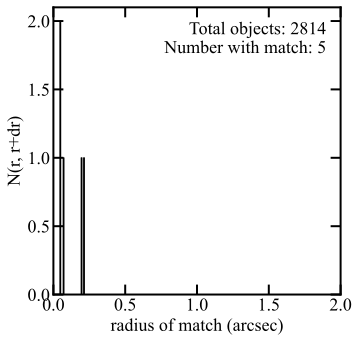

In [109]:
# crossmatch catalogs
max_radius = 2. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(milliquas_v710_BLBX,lamost_phase1_v03_dr1to5_QSO_dataX,  max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])
hist(dist_match,
     #bins='knuth',
     bins=30,
     ax=ax, #
     histtype='stepfilled', ec='k', fc='#AAAAAA')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (milliquas_v710_BLB.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
plt.show()

In [110]:
np.sum(match)

5

In [111]:
milliquas_v710_BLB[match]

FITS_rec([(159.4346162, 57.1987861, 'IERS 1034+574', 'BR2X', 16.41, 16.73, 'gG', '-', '-', 1.096, 'VCRF', 'VCRF', 100, 97, '2SXPS J103744.2+571154', 'VLAJ103744.28+571156.3', 'ILDJ103743.48+571157.1', 'ILDJ103745.58+571151.0'),
          (160.7309754, 15.2208131, 'SDSS J104255.44+151314.9', 'BR', 18.35, 19.9 , 'pG', '-', '-', 0.307, '0015', '1220',  99, 84, '', 'VLAJ104255.42+151315.0', 'FIRST J104255.4+151315', 'RACS J104255.4+151315'),
          (192.8245141, 10.6520318, '1RXS 125117.4+103914', 'BRX', 17.03, 18.18, 'p+G', '-', '-', 0.245, '0011', 'DR16', 100, 92, 'CXOX J125117.7+103908', 'VLAJ125117.88+103907.3', 'FIRST J125117.8+103907', 'RACS J125117.9+103907'),
          (202.4702742, 31.9030704, '87GB 13275+3209', 'BRX', 20.  , 20.54, 'gG', '-', '-', 2.01 , '1749', '4FGL4', 100, 92, '2SXPS J132952.6+315408', 'ILDJ132952.86+315411.0', 'FIRST J132952.8+315411', 'NVSS J132952.8+315411'),
          (262.3281705, 52.9331339, 'SDSS J172918.75+525559.3', 'BRX', 17.87, 19.2 , 'pG', '-', 

In [112]:
select_labels=['RA','DEC','NAME']
for i,j,k in zip(milliquas_v710_BLB[match][select_labels[0]],milliquas_v710_BLB[match][select_labels[1]],milliquas_v710_BLB[match][select_labels[2]]):
    print(i,j,k)

159.4346162 57.1987861 IERS 1034+574
160.7309754 15.2208131 SDSS J104255.44+151314.9
192.8245141 10.6520318 1RXS 125117.4+103914
202.4702742 31.9030704 87GB 13275+3209
262.3281705 52.9331339 SDSS J172918.75+525559.3


In [ ]:
# crossmatch catalogs
max_radius = 2. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(lamost_phase1_v03_dr1to5_QSO_dataX, milliquas_v710_BLBX, max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])
hist(dist_match,
     #bins='knuth',
     bins=30,
     ax=ax, #
     histtype='stepfilled', ec='k', fc='#AAAAAA')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (milliquas_v710_BLB.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
plt.show()

In [ ]:
lamost_phase1_v03_dr1to5_QSO_data[match]

In [ ]:
for i in lamost_phase1_v03_dr1to5_QSO_data[match]['obsid']:
    print(i)

## match dr6-9QSO vs BLL

In [107]:
len(lamost_dr6to9_QSO_data)

13066

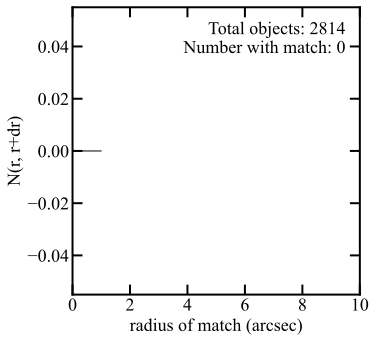

In [108]:
# crossmatch catalogs
max_radius = 10. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(milliquas_v710_BLBX,lamost_dr6to9_QSO_dataX,  max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])
hist(dist_match,
     #bins='knuth',
     bins=30,
     ax=ax, #
     histtype='stepfilled', ec='k', fc='#AAAAAA')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (milliquas_v710_BLB.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
plt.show()

## match dr10QSO vs BLL

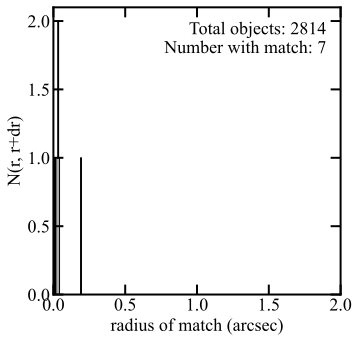

In [118]:
# crossmatch catalogs
max_radius = 2. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(milliquas_v710_BLBX,lamost_dr10v1_data_QSOX,  max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])
hist(dist_match,
     #bins='knuth',
     bins=30,
     ax=ax, #
     histtype='stepfilled', ec='k', fc='#AAAAAA')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (milliquas_v710_BLB.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
plt.show()

In [119]:
np.sum(match)

7

In [120]:
select_labels=['RA','DEC','NAME']
for i,j,k in zip(milliquas_v710_BLB[match][select_labels[0]],milliquas_v710_BLB[match][select_labels[1]],milliquas_v710_BLB[match][select_labels[2]]):
    print(i,j,k)


24.1358256 39.0997769 B3 0133+388
29.1308771 39.2419235 MG4 J015630+3913
138.0467108 27.9910795 SDSS J091211.21+275927.9
144.9105038 -3.2511027 3HSPJ093938.5-031503
191.7530234 44.3885562 BZBJ1247+4423
226.5734841 43.570447 SDSS J150617.64+433413.6
258.6897483 30.6077696 SDSS J171445.53+303628.0


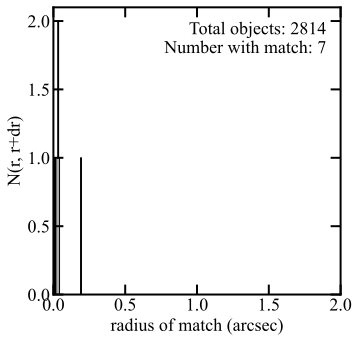

In [121]:
# crossmatch catalogs
max_radius = 2. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(lamost_dr10v1_data_QSOX, milliquas_v710_BLBX, max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])
hist(dist_match,
     #bins='knuth',
     bins=30,
     ax=ax, #
     histtype='stepfilled', ec='k', fc='#AAAAAA')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (milliquas_v710_BLB.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
plt.show()

In [ ]:
lamost_dr10v1_data_QSO[match]['obsid']

In [122]:
for i in lamost_dr10v1_data_QSO[match]['obsid']:
    print(i)

484711184
584813190
813204099
823214008
109107029
282403124
407807198


In [ ]:
318202211, 301703120, 451112124, 451712088, 462011142
484711184, 584813190, 813204099, 823214008, 109107029, 282403124,407807198

In [ ]:
318202211
301703120
451112124
451712088

462011142

484711184
584813190
813204099
823214008
109107029
282403124
407807198

In [ ]:
159.4346162 57.1987861 IERS 1034+574
160.7309754 15.2208131 SDSS J104255.44+151314.9
192.8245141 10.6520318 1RXS 125117.4+103914
202.4702742 31.9030704 87GB 13275+3209
262.3281705 52.9331339 SDSS J172918.75+525559.3

## match dr10GALAXY vs BLL

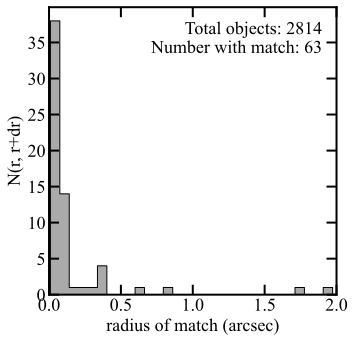

In [116]:
# crossmatch catalogs
max_radius = 2. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(milliquas_v710_BLBX,lamost_dr10v1_data_GALAXYX,  max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])
hist(dist_match,
     #bins='knuth',
     bins=30,
     ax=ax, #
     histtype='stepfilled', ec='k', fc='#AAAAAA')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (milliquas_v710_BLB.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
plt.show()

## Fermi_4LAC_DR3_h_bllX with dr10QSO

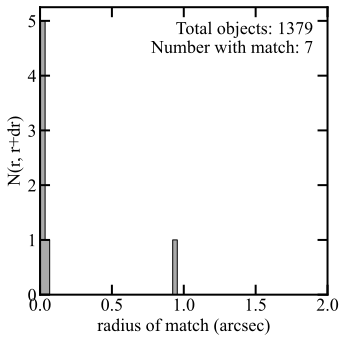

In [190]:
# crossmatch catalogs
max_radius = 2. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(Fermi_4LAC_DR3_h_bllX,lamost_dr10v1_data_QSOX,  max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])
hist(dist_match,
     #bins='knuth',
     bins=30,
     ax=ax, #
     histtype='stepfilled', ec='k', fc='#AAAAAA')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (Fermi_4LAC_DR3_h_bllX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
plt.show()

Fermi_4LAC_DR3_h_bll[match]

In [191]:
with open('Fermi_4LAC_DR3_h_bllX with dr10QSO_zFermi.txt','w+') as f:
    for i,j,k in zip(Fermi_4LAC_DR3_h_bll[match]['RA_Counterpart'],Fermi_4LAC_DR3_h_bll[match]['DEC_Counterpart'],Fermi_4LAC_DR3_h_bll[match]['redshift']):
        print(i,j,k)
        if k:
            f.write('%.5f,%.5f,%.3f \n'%(i,j,k))
        else:
            f.write('%.5f,%.5f,-1 \n'%(i,j))
            

24.1358265417 39.0997772972 -inf
138.04671365 27.9910763222 -inf
164.623355025 1.56633992778 0.89
189.852451367 7.50477473611 0.4
191.75303649902344 44.38882827758789 0.6
226.573484904 43.5704475 0.47
229.130715533 43.8304475611 -inf


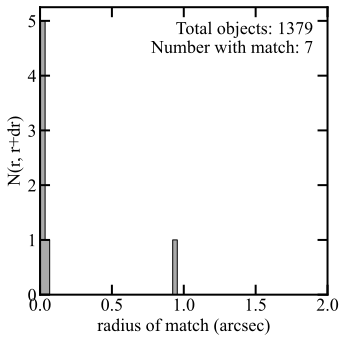

In [192]:
# crossmatch catalogs
max_radius = 2. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(lamost_dr10v1_data_QSOX, Fermi_4LAC_DR3_h_bllX, max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])
hist(dist_match,
     #bins='knuth',
     bins=30,
     ax=ax, #
     histtype='stepfilled', ec='k', fc='#AAAAAA')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (Fermi_4LAC_DR3_h_bllX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
plt.show()

In [163]:
for i in lamost_dr10v1_data_QSO[match]['obsid']:
    print(i)

823214008
823215224
999502014
109107029
282403124
407807198
438216102


In [ ]:
lamost_dr10v1_data_QSO[match]

In [193]:
with open('Fermi_4LAC_DR3_h_bllX with dr10QSO__zLAMOST.txt','w+') as f:   
    for m,n,i,j,k,l in zip(lamost_dr10v1_data_QSO[match]['ra_obs'],lamost_dr10v1_data_QSO[match]['dec_obs'],lamost_dr10v1_data_QSO[match]['obsid'],lamost_dr10v1_data_QSO[match]['z'],lamost_dr10v1_data_QSO[match]['planid'],lamost_dr10v1_data_QSO[match]['spid']):
        print(m,n,j,i,k,l)
        if j:
            f.write('%.5f,%.5f,%.3f \n'%(m,n,j))
        else:
            f.write('%.5f,%.5f,-1 \n'%(m,n))

226.5734829 43.5704479 0.972193 823214008 HD151718N423357M02 14
229.1307106 43.8304478 0.4531 823215224 HD151718N423357M02 15
189.8524508 7.5047739 1.02323 999502014 HD124702N090350M02 2
191.7530325 44.3885631 -9999.0 109107029 HD124214N455237F01 7
138.04672 27.991086 -9999.0 282403124 HD091735N272519M01 3
24.135835 39.099777 0.004034 407807198 M31021N40B2 7
164.62336 1.5663317 0.890756 438216102 HD110103N000249M01 16


In [174]:
!open .

## Fermi_4LAC_DR3_h_bllX with dr10galaxy

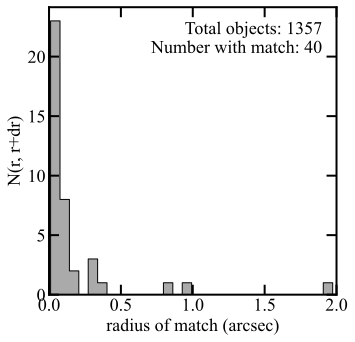

In [105]:
# crossmatch catalogs
max_radius = 2. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(Fermi_4LAC_DR3_h_bllX,lamost_dr10v1_data_GALAXYX,  max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])
hist(dist_match,
     #bins='knuth',
     bins=30,
     ax=ax, #
     histtype='stepfilled', ec='k', fc='#AAAAAA')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (Fermi_4LAC_DR3_h_bllX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
plt.show()

## Fermi_4LAC_DR3_h_fsrqX with dr10QSO

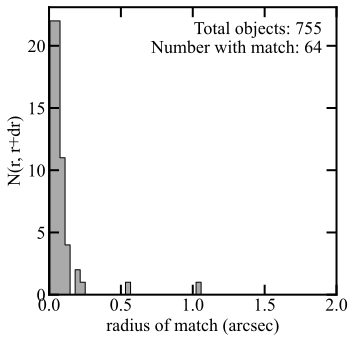

In [135]:
# crossmatch catalogs
max_radius = 2. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(Fermi_4LAC_DR3_h_fsrqX,lamost_dr10v1_data_QSOX,  max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])
hist(dist_match,
     #bins='knuth',
     bins=30,
     ax=ax, #
     histtype='stepfilled', ec='k', fc='#AAAAAA')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (Fermi_4LAC_DR3_h_fsrqX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
plt.show()

## Fermi_4LAC_DR3_h_fsrqX with dr10galaxy

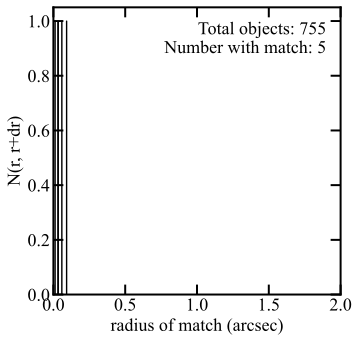

In [188]:
# crossmatch catalogs
max_radius = 2. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(Fermi_4LAC_DR3_h_fsrqX,lamost_dr10v1_data_GALAXYX,  max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])
hist(dist_match,
     #bins='knuth',
     bins=30,
     ax=ax, #
     histtype='stepfilled', ec='k', fc='#AAAAAA')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (Fermi_4LAC_DR3_h_fsrqX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
plt.show()

Fermi_4LAC_DR3_h_fsrq.columns

In [189]:
with open('Fermi_4LAC_DR3_h_fsrqX with dr10GALAXY_zFermi.txt','w+') as f:
    for i,j,k in zip(Fermi_4LAC_DR3_h_fsrq[match]['RA_Counterpart'],Fermi_4LAC_DR3_h_fsrq[match]['DEC_Counterpart'],Fermi_4LAC_DR3_h_fsrq[match]['redshift']):
        print(i,j,k)
        if k:
            f.write('%.5f,%.5f,%.3f \n'%(i,j,k))
        else:
            f.write('%.5f,%.5f,-1 \n'%(i,j))        

1.48823080417 38.3375414 0.229
228.065590604 2.05471645833 0.219915
243.92173825 47.1866011028 0.19863
264.66876220703125 32.40250778198242 0.126
354.5318991 3.44690330833 0.27


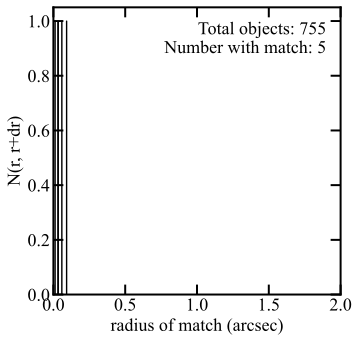

In [186]:
# crossmatch catalogs
max_radius = 2. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(lamost_dr10v1_data_GALAXYX,Fermi_4LAC_DR3_h_fsrqX,  max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])
hist(dist_match,
     #bins='knuth',
     bins=30,
     ax=ax, #
     histtype='stepfilled', ec='k', fc='#AAAAAA')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (Fermi_4LAC_DR3_h_fsrqX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
plt.show()

In [141]:
lamost_dr10v1_data_GALAXYX[match]

array([[228.0656   ,   2.054718 ],
       [  1.4882042,  38.337526 ],
       [243.92174  ,  47.18661  ],
       [264.66876  ,  32.40251  ],
       [354.5318838,   3.4469092]])

In [142]:
for i in lamost_dr10v1_data_GALAXY[match]['obsid']:
    print(i)

573706143
474602250
812301061
156103034
269812241


lamost_dr10v1_data_GALAXY.columns

In [187]:
with open('Fermi_4LAC_DR3_h_fsrqX with dr10GALAXY_zLAMOST.txt','w+') as f:
    for i,j,k,l,m,n in zip(lamost_dr10v1_data_GALAXY[match]['obsid'],lamost_dr10v1_data_GALAXY[match]['z'],lamost_dr10v1_data_GALAXY[match]['planid'],lamost_dr10v1_data_GALAXY[match]['spid'],lamost_dr10v1_data_GALAXY[match]['ra_obs'],lamost_dr10v1_data_GALAXY[match]['dec_obs']):
        print(m,n,j,i,k,l)
        if j:
            f.write('%.5f,%.5f,%.3f \n'%(m,n,j))
        else:
            f.write('%.5f,%.5f,-1 \n'%(m,n))        

228.0656 2.054718 0.219658 573706143 HD150254N020528M01 6
1.4882042 38.337526 0.229069 474602250 M31003N39M1 2
243.92174 47.18661 0.1987 812301061 HD161911N490217M02 1
264.66876 32.40251 0.128957 156103034 HD174315N325903M01 3
354.5318838 3.4469092 0.268522 269812241 EG233528N011847M01 12


## match Roma_BZCAT with dr10QSO

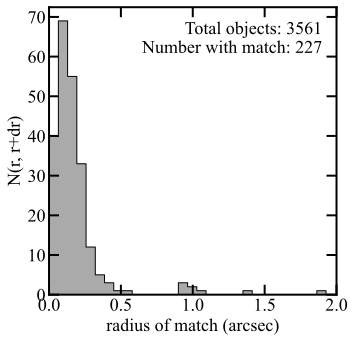

In [263]:
# crossmatch catalogs
max_radius = 2. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(Roma_BZCAT_dataX,lamost_dr10v1_data_QSOX,  max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])
hist(dist_match,
     #bins='knuth',
     bins=30,
     ax=ax, #
     histtype='stepfilled', ec='k', fc='#AAAAAA')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (Roma_BZCAT_dataX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
plt.show()

## match Roma_BZCAT with dr10Galaxy

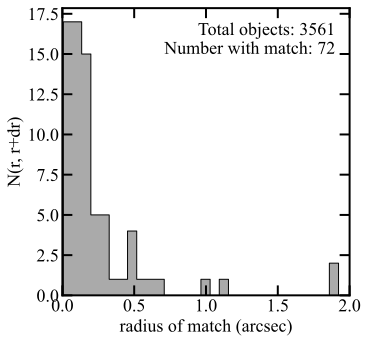

In [264]:
# crossmatch catalogs
max_radius = 2. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(Roma_BZCAT_dataX,lamost_dr10v1_data_GALAXYX,  max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])
hist(dist_match,
     #bins='knuth',
     bins=30,
     ax=ax, #
     histtype='stepfilled', ec='k', fc='#AAAAAA')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (Roma_BZCAT_dataX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
plt.show()

## match with dr1-5QSO

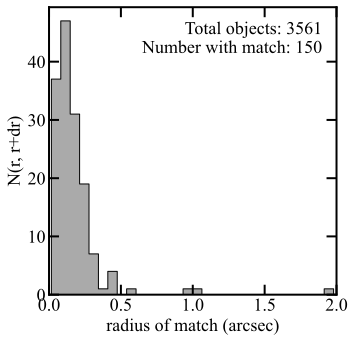

In [261]:
# crossmatch catalogs
max_radius = 2. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(Roma_BZCAT_dataX,lamost_phase1_v03_dr1to5_QSO_dataX,  max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])
hist(dist_match,
     #bins='knuth',
     bins=30,
     ax=ax, #
     histtype='stepfilled', ec='k', fc='#AAAAAA')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (Roma_BZCAT_dataX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
plt.show()

## match lamost_dr6to9_QSO_dataX

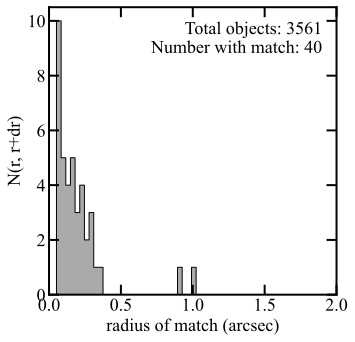

In [262]:
# crossmatch catalogs
max_radius = 2. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(Roma_BZCAT_dataX,lamost_dr6to9_QSO_dataX,  max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])
hist(dist_match,
     #bins='knuth',
     bins=30,
     ax=ax, #
     histtype='stepfilled', ec='k', fc='#AAAAAA')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (Roma_BZCAT_dataX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
plt.show()

# CLB list

In [195]:
CLB_list=pd.read_csv('/Users/lyubing/Downloads/kangshiju_paper/A02_Table_catalog_plot.csv')

In [196]:
CLB_list

Unnamed: 0                 V1 V2                             V3  V4  \
0             1  4FGL J0001.2-0747  &               Kang et al. 2023  \\   
1             2  4FGL J0003.2+2207  &               Kang et al. 2023  \\   
2             3  4FGL J0003.9-1149  &               Kang et al. 2023  \\   
3             4  4FGL J0006.3-0620  &               Kang et al. 2023  \\   
4             5  4FGL J0006.3-0620  &     \cite{2022arXiv220810104X}  \\   
..          ...                ... ..                            ...  ..   
447         448  4FGL J2353.7-3037  &  \citealt{2022ApJ...935....4Z}  \\   
448         449  4FGL J2353.7-3037  &               Kang et al. 2023  \\   
449         450  4FGL J2357.4-0152  &     \cite{2022MNRAS.515.2215C}  \\   
450         451  4FGL J2357.4-0152  &     \cite{2022arXiv220810104X}  \\   
451         452  4FGL J2357.4-0152  &               Kang et al. 2023  \\   

              V5   X.6   X.5   X.4   X.3  ...  log10flux_synpeak  log10nu_IC  \
0    Predictions     1     1     1   821  ...                NaN         NaN   
1    Predictions    11    11    11   831  ...             -12.23       22.16   
2    Predictions    15    15    15   832  ...                NaN         NaN   
3    Predictions    20    20    20   836  ...             -11.09       19.66   
4            CLB    20    20    20   836  ...             -11.09       19.66   
..           ...   ...   ...   ...   ...  ...                ...         ...   
447  Predictions  3717  3717  3717  3722  ...                NaN         NaN   
448  Predictions  3717  3717  3717  3722  ...                NaN         NaN   
449  Predictions  3726  3726  3726  3729  ...             -12.18       22.43   
450          CLB  3726  3726  3726  3729  ...             -12.18       22.43   
451  Predictions  3726  3726  3726  3729  ...             -12.18       22.43   

    log10flux_ICpeak    CD   Ld_Ledd  Log_LE_lum  Log_HE_lum  Log_LE_lum.1  \
0                NaN   NaN       NaN         NaN         NaN           NaN   
1             -12.91  0.21  0.000336   43.010858   42.912014     43.010858   
2                NaN   NaN       NaN   45.563719   45.452446     45.563719   
3             -12.04  0.11  0.002993   45.373067   43.871257     45.373067   
4             -12.04  0.11  0.002993   45.373067   43.871257     45.373067   
..               ...   ...       ...         ...         ...           ...   
447              NaN   NaN       NaN   45.446646   45.006527     45.446646   
448              NaN   NaN       NaN   45.446646   45.006527     45.446646   
449           -11.97  1.62  0.029245   45.038921   44.958829     45.038921   
450           -11.97  1.62  0.029245   45.038921   44.958829     45.038921   
451           -11.97  1.62  0.029245   45.038921   44.958829     45.038921   

     Log_HE_lum.1  Log_Luminosity_X_band  
0             NaN                    NaN  
1       42.912014              40.290371  
2       45.452446              44.325376  
3       43.871257              43.776630  
4       43.871257              43.776630  
..            ...                    ...  
447     45.006527              43.408027  
448     45.006527              43.408027  
449     44.958829              43.364043  
450     44.958829              43.364043  
451     44.958829              43.364043  

[452 rows x 269 columns]

In [197]:
CLB_list_CLB=CLB_list[CLB_list['V5']=='CLB']

In [200]:
CLB_list_CLB=drop_index(CLB_list_CLB)

In [202]:
CLB_list_CLB.columns

Index(['Unnamed: 0', 'V1', 'V2', 'V3', 'V4', 'V5', 'X.6', 'X.5', 'X.4', 'X.3',
       ...
       'log10flux_synpeak', 'log10nu_IC', 'log10flux_ICpeak', 'CD', 'Ld_Ledd',
       'Log_LE_lum', 'Log_HE_lum', 'Log_LE_lum.1', 'Log_HE_lum.1',
       'Log_Luminosity_X_band'],
      dtype='object', length=269)

In [203]:
CLB_list_CLB[['V1']].to_csv('/Users/lyubing/Downloads/kangshiju_paper/CLBname.csv',index=False)

CLB_list_CLB['V1'][0].strip().replace(' ','')

In [208]:
CLB=pd.read_csv('/Users/lyubing/Downloads/kangshiju_paper/CLBname.csv')

CLB

In [266]:
CLB_list_CLB.columns

Index(['Unnamed: 0', 'V1', 'V2', 'V3', 'V4', 'V5', 'X.6', 'X.5', 'X.4', 'X.3',
       ...
       'log10flux_synpeak', 'log10nu_IC', 'log10flux_ICpeak', 'CD', 'Ld_Ledd',
       'Log_LE_lum', 'Log_HE_lum', 'Log_LE_lum.1', 'Log_HE_lum.1',
       'Log_Luminosity_X_band'],
      dtype='object', length=269)

In [273]:
CLB_list_CLB_candidates=CLB_list[CLB_list['V5']=='Predictions']

In [274]:
len(CLB_list_CLB_candidates)

310

In [275]:
CLB_list_CLB_candidates[['V1']].to_csv('/Users/lyubing/Downloads/kangshiju_paper/CLB_list_CLB_candidates_name.csv',index=False)